# Hypothesis Testing

### 1. Creating a Sample Distribution from our Control and Experimental groups

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/drug_trial.csv"
df = pd.read_csv(file_name)
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [2]:
df['group'].unique()

array(['Control', 'Experimental'], dtype=object)

In [3]:
# Show means of Control and Experimental groups

control_mean =  df[df['group'] == 'Control'].mean()
experiment_mean = df[df['group'] == 'Experimental'].mean()
print("Control Mean = " +str(control_mean))
print("Experimental Mean = " + str(experiment_mean))

Control Mean = mean_duration    5.4
dtype: float64
Experimental Mean = mean_duration    4.8
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


# Let's run 10,000 Permutations 

Mean Differences Mean - 0.0034244903768607463


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


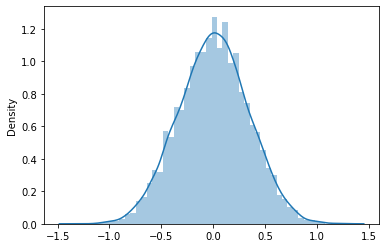

In [4]:
mean_difference = control_mean - experiment_mean
data_points = list(df['mean_duration'])
mean_differences = []
number_of_iterations = 10000

for i in range(number_of_iterations):
    group_1 = []
    group_2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0,2)==True
        if random_assignment:
            group_1.append(data_point)
        else:
            group_2.append(data_point)

    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences.append(trial_mean_difference)
    
print("Mean Differences Mean - " + str(np.array(mean_differences).mean()))    
# Generate Frequency or Histogram Plot
sns.distplot(mean_differences)

## How many values exceed the mean difference of 0.6?

In [5]:
# Convert our mean_differences to a data frame for easy manipulation
mean_differences = pd.DataFrame(mean_differences)

# Get the length of this series to count the number of value exceeding 0.6
exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
print(exceeds_mean_diff)

384


## Calculating the P-Value

In [6]:
# Number of trials we performed was 10,000
# P-Value is equal to the 

p_value = exceeds_mean_diff / number_of_iterations
print(p_value)

0.0384
